<a href="https://colab.research.google.com/github/kiri182/DataScience/blob/main/coin__prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install Historic-Crypto
%pip install prophet

In [ ]:
# Retrieve a dataset
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

df = HistoricalData('BTC-USD',86400,'2010-01-01-00-00').retrieve_data() # end_date is now(Default)

In [ ]:
# Preprocess
df = df.reset_index()

# 'ds' is date date / 'y' is data to be predicted.
new_df = df.rename(columns={'time':'ds', 'close':'y'})

df.head()

In [74]:
# Machine Learning
import pandas as pd
from prophet import Prophet

# Learning

test_length = 90
train = new_df.iloc[:-test_length]
test = new_df.iloc[-test_length:]

m = Prophet()
m.fit(train)

# Predict
future = m.make_future_dataframe(periods=7, freq='D')
forecast = m.predict(future)
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6iea4jd_/83gbiqh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6iea4jd_/wa27xrdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20979', 'data', 'file=/tmp/tmp6iea4jd_/83gbiqh7.json', 'init=/tmp/tmp6iea4jd_/wa27xrdc.json', 'output', 'file=/tmp/tmp6iea4jd_/prophet_modelafv045b1/prophet_model-20230306092415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-20,-141.588189,-9136.920807,2761.132259,-141.588189,-141.588189,-2942.052140,-2942.052140,-2942.052140,17.252490,17.252490,17.252490,-2959.304630,-2959.304630,-2959.304630,0.0,0.0,0.0,-3083.640330
1,2015-07-21,-139.566533,-8642.874589,2720.291240,-139.566533,-139.566533,-2854.816209,-2854.816209,-2854.816209,-7.249941,-7.249941,-7.249941,-2847.566269,-2847.566269,-2847.566269,0.0,0.0,0.0,-2994.382742
2,2015-07-22,-137.544877,-8609.257633,2913.099191,-137.544877,-137.544877,-2704.857353,-2704.857353,-2704.857353,28.787483,28.787483,28.787483,-2733.644836,-2733.644836,-2733.644836,0.0,0.0,0.0,-2842.402230
3,2015-07-23,-135.523220,-8633.885856,3380.701350,-135.523220,-135.523220,-2639.505021,-2639.505021,-2639.505021,-21.443041,-21.443041,-21.443041,-2618.061980,-2618.061980,-2618.061980,0.0,0.0,0.0,-2775.028241
4,2015-07-24,-133.501564,-8504.582756,3337.388261,-133.501564,-133.501564,-2514.026170,-2514.026170,-2514.026170,-12.712265,-12.712265,-12.712265,-2501.313905,-2501.313905,-2501.313905,0.0,0.0,0.0,-2647.527734


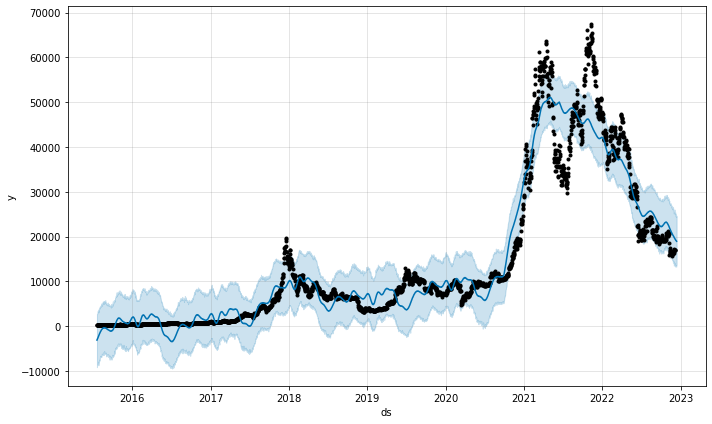

In [75]:
fig1 = m.plot(forecast)

In [76]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '7 days')

In [81]:
df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p.head(10)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,4.862134e+07,6972.900196,4658.916078,0.264243,0.192247,0.239086,0.230769
1,2 days,3.902069e+07,6246.654543,4281.581339,0.253036,0.195673,0.231452,0.230769
2,3 days,4.143494e+07,6436.997490,4366.722485,0.250792,0.212239,0.235359,0.307692
3,4 days,3.940375e+07,6277.240787,4348.834496,0.247095,0.218719,0.235282,0.307692
4,5 days,5.079464e+07,7127.035930,4900.464615,0.282429,0.238179,0.266745,0.230769
5,6 days,4.790903e+07,6921.634857,4697.589215,0.258977,0.239767,0.244965,0.384615
6,7 days,4.391384e+07,6626.752069,4634.859726,0.249914,0.256067,0.241079,0.384615


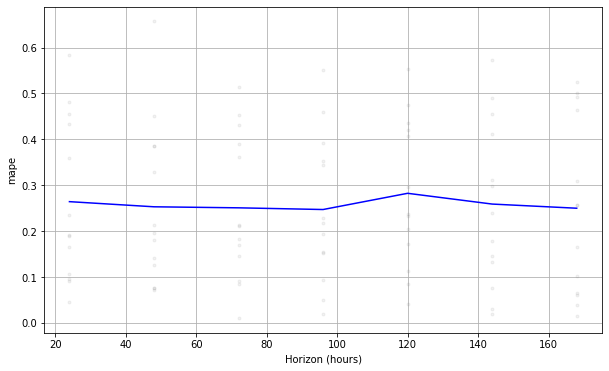

In [82]:
from prophet.plot import plot_cross_validation_metric

fig2 = plot_cross_validation_metric(df_cv, metric='mape')